# Retail Price Optimization

Retail price optimization is the process of setting prices for products sold by retailers to maximize their profits. The goal is to find the optimal price point that will attract customers and generate sales, while also maximizing profit margins. Retailers use various techniques to optimize their prices, such as competitor analysis, customer segmentation, and price testing. Competitor analysis involves monitoring the prices of similar products offered by competitors and adjusting prices accordingly. Customer segmentation involves dividing customers into groups based on their buying behavior and setting prices for each group accordingly. Price testing involves experimenting with different price points to determine the price that maximizes profits. It can help retailers to increase their profits and improve their competitiveness in the marketplace. It requires a deep understanding of customer behavior, market trends, and pricing strategies, as well as the ability to collect and analyze data on sales and pricing. Retailers who can successfully optimize their prices can gain a significant competitive advantage, while also providing customers with products at fair and reasonable prices.

### How are these prices optimized ?

Using several features about existing products, **Regression** techniques can be applied to find an optimal price. These features may include Competitor prices and ratings too, as Analyzing competitors’ pricing strategies is essential in optimizing retail prices. Monitoring and benchmarking against competitors’ prices can help identify opportunities to price competitively, either by pricing below or above the competition, depending on the retailer’s positioning and strategy. Other than that, these features also include temporal features, indicating the sales of a particular product over time, which may also require **Demand Forecasting**. Total prices, number of customers, quantity of a product sold, all help in finding the sweet spot for retailers where they can maximize their profits. Finally, if efficient customer data is available, they can be segmented into different groups using **Clustering**, making it easier to cater to a particular audience for a given product.


# Let's Get Started

<div class="alert alert-success" role="alert">
    <h3>In this Project</h3>
    <ul>
        <li>EDA on Retail data with several products</li>
        <li>Regression Model for predicting Optimal Prices</li>
        <li>Model Explainability</li>
    </ul>
</div>

In [32]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=52b7e91f631e34e03e440dca2e7829f5b4c79b6a54b707776b167625fc1ead77
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [40]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 6.0 MB/s eta 0:00:00


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

import eli5
from eli5.sklearn import PermutationImportance
import shap

# Loading Data

In [3]:
df = pd.read_csv('/kaggle/input/retail-price-optimization/retail_price.csv')
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
product_id,bed1,bed1,bed1,bed1,bed1,bed1,bed1,bed1,bed1,bed1
product_category_name,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table
month_year,01-05-2017,01-06-2017,01-07-2017,01-08-2017,01-09-2017,01-10-2017,01-11-2017,01-12-2017,01-01-2018,01-02-2018
qty,1,3,6,4,2,3,11,6,19,18
total_price,45.95,137.85,275.7,183.8,91.9,137.85,445.85,239.94,759.81,719.82
freight_price,15.1,12.933333,14.84,14.2875,15.1,15.1,15.832727,15.23,16.533684,13.749444
unit_price,45.95,45.95,45.95,45.95,45.95,45.95,40.531818,39.99,39.99,39.99
product_name_lenght,39,39,39,39,39,39,39,39,39,39
product_description_lenght,161,161,161,161,161,161,161,161,161,161
product_photos_qty,2,2,2,2,2,2,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

### Shape of the Dataset

In [5]:
print(f"Columns: {df.shape[1]}\nSamples: {df.shape[0]}")

Columns: 30
Samples: 676


### Checking for NA values

In [6]:
any(df.isna().sum() > 0)

False

### Some Stats ...

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


# Exploratory Data Analysis

In [8]:
fig = px.histogram(df,
                   x='total_price',
                   nbins=20,
                   title='Distribution of Total Price')
fig.show()

In [9]:
fig = px.box(df,
             y='unit_price',
             title='Distribution of Unit Price')
fig.show()

In [10]:
fig = px.scatter(df,
                 x='qty',
                 y='total_price', trendline='ols',
                 title='Quantity vs Total Price')
fig.show()

In [11]:
fig = px.bar(df, x='product_category_name',
             y='total_price', title='Total Price by Product Category')
fig.show()

In [12]:
fig = px.bar(df, x='product_category_name',
             y='unit_price', title='Unit Price by Product Category')
fig.show()

In [13]:
fig = px.box(df, x='weekday',
             y='total_price',
             title='Box Plot of Total Price by number of Weekdays in a Month')
fig.show()

In [14]:
fig = px.box(df, x='weekend',
             y='total_price',
             title='Box Plot of Total Price by number of Weekend days in a Month')
fig.show()

### Comparison with Competitor Products

As mentioned previously, competitor analysis is quite essential. Therefore, we compare the unit and shipping prices of every product to those of 3 different competitors.
* For this, we simply calculate the difference between each pair

### Price

In [15]:
df['comp1_diff'] = df['unit_price'] - df['comp_1']
df['comp2_diff'] = df['unit_price'] - df['comp_2']
df['comp3_diff'] = df['unit_price'] - df['comp_3']

for i in range(1,4):
    comp = f"comp{i}_diff"
    fig = px.bar(x=df['product_category_name'],
                 y=df[comp],
                 title=f"Competitor {i} Price Difference per Unit",
                 labels={
                     'x': 'Product Category',
                     'y': f'Competitor {i}'
                 })
    fig.show()

### Freight Price

In [16]:
df['fp1_diff'] = df['freight_price'] - df['fp1']
df['fp2_diff'] = df['freight_price'] - df['fp2']
df['fp3_diff'] = df['freight_price'] - df['fp3']

for i in range(1,4):
    comp = f"comp{i}_diff"
    fig = px.bar(x=df['product_category_name'],
                 y=df[comp],
                 title=f"Competitor {i} Shipping Price Difference",
                 labels={
                     'x': 'Product Category',
                     'y': f'Competitor {i}'
                 })
    fig.show()

### Correlation Analysis with Unit Price

In [17]:
corrs = df.corr()['unit_price'].sort_values(ascending=False)
fig = px.bar(x=corrs.keys(), y=corrs.values,
             title='Correlation of Features with Unit Price',
             labels={
                 'x': 'Features',
                 'y': 'Correlation'
             })
fig.show()

### Month-wise Sales Analysis

This dataset includes features that are **temporal** in nature. The attributes of each product (sales, quantity, etc) are shown over a span of several months. Hence, we take a look at this data aggregated across time.

In [18]:
monthly_df = df.groupby(by='month_year').agg({
    'unit_price': 'mean', 'total_price': 'sum', 'freight_price': 'sum',
    'qty': 'sum', 'weekday': 'sum', 'weekend': 'sum', 'customers': 'sum'
}).reset_index()
monthly_df['month_year'] = pd.to_datetime(monthly_df['month_year'], format='%d-%m-%Y')
monthly_df = monthly_df.sort_values(by='month_year')

In [19]:
monthly_df.head()

,month_year,unit_price,total_price,freight_price,qty,weekday,weekend,customers
0,2017-01-01,207.445000,2864.19,33.961250,9,44,18,18
2,2017-02-01,127.827143,3584.11,217.847838,35,180,72,78
4,2017-03-01,122.586615,10204.38,282.314965,101,299,104,242
6,2017-04-01,119.288667,11524.62,335.440132,121,300,150,309
8,2017-05-01,104.785769,21843.33,393.828633,222,460,160,803


In [20]:
fig = px.scatter(monthly_df,
                 x='customers', y='total_price', trendline='ols',
                 title='Total Price vs Number of Customers')
fig.show()

In [21]:
fig = px.scatter(monthly_df,
             x='weekend', y='total_price', trendline='ols',
             title='Weekly Analysis of Total Price')
fig.show()

In [22]:
fig = px.bar(monthly_df,
             x='month_year', y='customers',
             title='Customers per month')
fig.show()

# Feature Engineering

### Creating an aggregated dataframe by products

Since the data involves recurring products across months, we create an aggregated dataframe to proceed with the problem. This is because we will be using **Regression Analysis**. Some of the features get dropped based on the Correlation Analysis results. With the remaining -
* Features like total_price, number of customers are aggregated by their sum
* Others, such as competitor differences, product score, unit price, are all aggregated by thier mean

In [23]:
cols_to_mean = ['product_id', 'month_year', 'comp1_diff', 'comp2_diff', 'comp3_diff',
                'fp1_diff', 'fp2_diff', 'fp3_diff', 'product_score', 'unit_price']
cols_to_sum = ['product_id', 'month_year', 'total_price', 'freight_price', 'customers']
mean_df = df[cols_to_mean]
sum_df = df[cols_to_sum]

### Aggregating the dataframes separately, based on type

In [24]:
products_mean = mean_df.groupby(by='product_id').mean()
products_sum = sum_df.groupby(by='product_id').sum()

### Join the dataframes

In [25]:
products = pd.concat([products_sum, products_mean],
                     axis=1, join='inner').reset_index()
products.head()

,product_id,total_price,freight_price,customers,comp1_diff,comp2_diff,comp3_diff,fp1_diff,fp2_diff,fp3_diff,product_score,unit_price
0,bed1,5831.77,240.410762,915,-43.976523,-47.634907,0.000000,-2.629416,-1.484667,0.000000,4.0,42.211989
1,bed2,42938.66,324.204152,968,0.000000,-28.547817,37.032861,0.000000,-0.989857,2.214245,3.9,86.774536
2,bed3,10304.96,172.316049,530,7.599892,0.000000,51.588471,-2.996105,0.000000,0.378738,3.3,92.101364
3,bed4,6011.77,151.576305,515,-38.826174,0.000000,6.085263,-3.644118,0.000000,-0.023987,4.2,46.725444
4,bed5,29997.36,96.015504,385,108.481703,0.000000,152.431703,3.761456,0.000000,4.750934,4.4,198.381703


### Features and Target

In [26]:
X, y = products.drop(['product_id', 'unit_price'], axis=1), products['unit_price']

# Model Building

Retail price optimization can be tackled as a regression problem, where the objective is to predict the optimal price for a given product, based on various factors such as product features, competitor prices, and customer behavior. **Regression** is a statistical technique used to analyze the relationship between two or more variables. It is commonly used to predict a dependent variable based on one or more independent variables, by modeling the relationship between them. The basic idea behind regression is to find the line or curve that best fits the data, so that we can use it to make predictions for new data points.

Here we are making use of **RandomForestRegressor**, a popular regression technique based on the Bagging method of Ensemble learning, Random Forest.

**Note**: The goal here is not to build the best model, but to highlight how this problem can be solved, and further deriving some business value through this solution, which will be done in a later section.

Anyways, onto the model

In [27]:
model = RandomForestRegressor(n_estimators=50, random_state=40)
model.fit(X, y)
y_pred = model.predict(X)

### Evaluate the model

In [28]:
print(f"R2 score: {r2_score(y, y_pred)}")

R2 score: 0.9653993851444929


In [29]:
print(f"Mean Absolute Error: {mean_absolute_error(y, y_pred)}")

Mean Absolute Error: 10.038151266352664


### Visualizing Results

In [30]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=y, y=y_pred, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted vs. Actual Retail Unit Price'))
fig.add_trace(go.Scatter(x=[min(y), max(y)], y=[min(y), max(y)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted vs. Actual Retail Price',
    xaxis_title='Actual Retail Price',
    yaxis_title='Predicted Retail Price'
)
fig.show()

# Model Explainability

As a data scientist, the job simply doesn't end with building a Machine Learning model that gives the best metrics. The main idea is to derive insights that can help a business or organization improve further. This is where Machine Learning Model explainability comes in.

Model explainability is the ability to understand and interpret how a machine learning model arrives at its predictions or decisions. It is an important aspect of machine learning, especially in applications where the stakes are high, such as healthcare or finance, where decisions made by the model can have significant consequences. Explainability allows us to understand the reasoning behind a model's predictions, and helps to build trust and confidence in the model. It also helps to identify any biases or errors in the model, which can be corrected or improved to enhance the model's performance.

One important feature of Model explainability is that it can help understand how the involved features are helping the model get better- or worse. These features are raw and collected from real world scenarios, so it is important to understand how they are affecting the model's predictions. Each feature brings a certain value, positive or negative, and sometimes, both are important in building an unbiased, generalized model. These insights are simplified, so that they can be explained to the non-technical audience involved in the process.

<div class="alert alert-success" role="alert">
    <h3>Techniques for Model Explainability</h3>
    <ul>
        <li>Permutation Importance</li>
        <li>SHAP (SHapley Additive exPlanations)</li>
        <li>SHAP summary plot</li>
    </ul>
</div>

### Permutation Importance

Permutation importance is a technique for measuring the importance of features in a machine learning model. It works by shuffling the values of a single feature in the test set and measuring the decrease in performance of the model. The idea behind this is that a feature which is important for the model's prediction should have a greater impact on the model's performance when its values are randomly permuted.

In [34]:
perm = PermutationImportance(model, random_state=1).fit(X, y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.3651 ± 0.0787,total_price
0.2193 ± 0.0345,comp1_diff
0.2063 ± 0.0817,comp2_diff
0.0590 ± 0.0278,customers
0.0263 ± 0.0145,comp3_diff
0.0104 ± 0.0029,product_score
0.0091 ± 0.0023,fp1_diff
0.0076 ± 0.0034,freight_price
0.0073 ± 0.0039,fp3_diff
0.0041 ± 0.0026,fp2_diff


### Predictions with Largest and Smallest Error

Using SHAP values to analyze what made the best prediction, the best, and the worst one, the worst. SHAP values break down a prediction to show the impact of each feature. This can help see the effects of each feature on a single prediction. SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value.

**Note**: SHAP values do not provide **Causality**

In [35]:
products['unit_price_pred'] = y_pred
products['error'] = abs(products['unit_price'] - products['unit_price_pred'])
products.head()

,product_id,total_price,freight_price,customers,comp1_diff,comp2_diff,comp3_diff,fp1_diff,fp2_diff,fp3_diff,product_score,unit_price,unit_price_pred,error
0,bed1,5831.77,240.410762,915,-43.976523,-47.634907,0.000000,-2.629416,-1.484667,0.000000,4.0,42.211989,42.489737,0.277748
1,bed2,42938.66,324.204152,968,0.000000,-28.547817,37.032861,0.000000,-0.989857,2.214245,3.9,86.774536,103.087462,16.312926
2,bed3,10304.96,172.316049,530,7.599892,0.000000,51.588471,-2.996105,0.000000,0.378738,3.3,92.101364,98.837131,6.735767
3,bed4,6011.77,151.576305,515,-38.826174,0.000000,6.085263,-3.644118,0.000000,-0.023987,4.2,46.725444,44.375751,2.349694
4,bed5,29997.36,96.015504,385,108.481703,0.000000,152.431703,3.761456,0.000000,4.750934,4.4,198.381703,185.783795,12.597908


In [36]:
max(products['error']), min(products['error'])

(42.57551522760048, 0.27774801323548104)

In [37]:
largest_error = products[products['error'] == max(products['error'])].drop(['product_id'], axis=1)
smallest_error = products[products['error'] == min(products['error'])].drop(['product_id'], axis=1)

### SHAP Values

In [42]:
data_for_prediction = largest_error
print("-------------------- LARGEST ERROR PREDICTION --------------------\n\n")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], data_for_prediction)

-------------------- LARGEST ERROR PREDICTION --------------------




In [43]:
data_for_prediction = smallest_error
print("-------------------- SMALLEST ERROR PREDICTION --------------------\n\n")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], data_for_prediction)

-------------------- SMALLEST ERROR PREDICTION --------------------




### Inferences

* The **base value** (AKA expected value) is the average of the model output over the training data
* In the first plot, we can see the prediction was much higher than the base value. The Competitor Differences were the major factors that led to such a high prediction. Among these, `comp_diff_1` had the highest impact. The competitor difference is high, and positive, which means that the competitors are selling for much lower and the total price is quite low. This is why the model predicts a high value, so that the product does not contribute to a loss for the retailer.
* In the second plot, the prediction was much lower than the base value. The competitor difference is negative (indicating that the competitors were selling at higher prices) and a high value of `total_price` is the major contributor. This explains why the model predicted a much lower value. Because the product is already being sold at a lower price compared to the competitors and with such a high value for total price means the optimal price is fairly low.

### SHAP Summary Plot

A SHAP (SHapley Additive exPlanations) summary plot is a type of visualization that shows the impact of different features on the output of a machine learning model. It is particularly useful for regression problems, where the goal is to predict a continuous output variable based on one or more input variables.

The basic idea behind a SHAP summary plot is to display the average impact of each input feature on the model's prediction, across all instances in the dataset. The plot shows a horizontal bar for each feature, with the length of the bar representing the magnitude of the feature's impact on the output. Features that have a positive impact are shown in blue, while those that have a negative impact are shown in red.

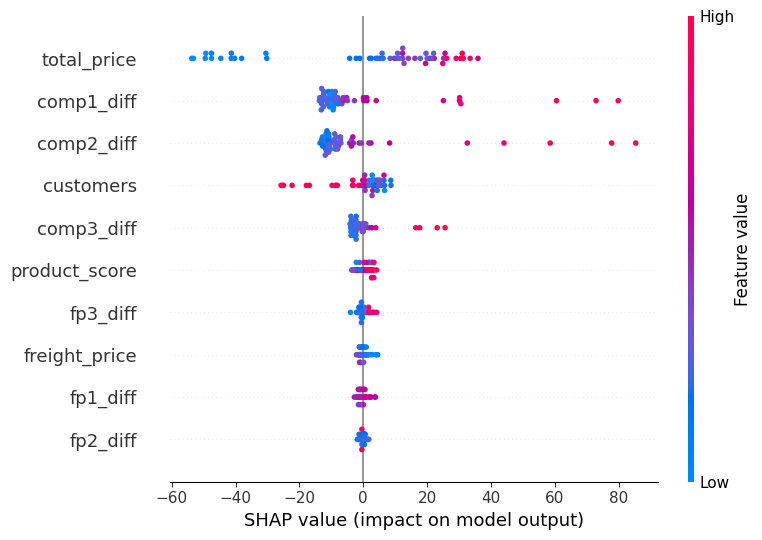

In [44]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

# Conclusion

<div class="alert alert-info">
The ultimate aim of optimizing retail prices is to charge a price that helps you make the most money and attracts enough customers to buy your products. It involves using data and pricing strategies to find the right price that maximizes your sales and profits while keeping customers happy.
    
